In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft, istft
from scipy.fft import fft, fftshift, fftfreq, ifft, ifftshift
import sklearn as sk
import scipy as sc
import scipy.signal as scp
import numpy.random as rnd
from scipy.io import wavfile
from IPython.display import Audio

import os

In [13]:
# Variables
data_path = "./data/1/"
fs = 48000

In [64]:
# Utility Functions


def iterate_all(root, function):
    """
    Apply function to all files under root
    returns 1 if succesfull, -1 if not.
    """
    for dirpath, dirnames, filenames in os.walk(root):
        for filename in filenames:
            t, signal = function(f"{dirpath}/{filename}")
            print(len(signal))
    
    return 1;

def generate_noisy(data, ratio):
    """
    Generate noisy variant of data.
    noise is additive and normally distributed
    """
    return data + rnd.normal(0,1,len(data)) * max(abs(data)) * ratio

def remove_silence(data):
    """
    remove silence
    """
    return data[abs(data) > abs(data).mean()*0.05]
    
def read_wav(path):
    """
    Reads wav file
    Returns time and signal vectors
    """
    fs, signal = wavfile.read(path)
    t = np.arange(0,len(signal)/fs, 1/fs)
    return [t, signal]
        

In [65]:
# Feature extraction functions
# http://practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/

def mel(f):
    """
    Transform to mel space
    """ 
    return 1125*np.log(1+f/700)

def imel(m):
    """
    Transform from mel space to frequency domain
    """
    return 700*(np.exp(m/1125) - 1)

def MFCC(signal, fs):
    """
    WORK IN PROGRESS
    Compute mel frequency coefficients
    """
    f, t, X = stft(x=signal, fs=fs, window='hann')
    mel(f)
    
    return [f, t, X]


In [66]:
#iterate_all("./data", read_wav)

/tmp/ipykernel_146/433662422.py:34: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, signal = wavfile.read(path)


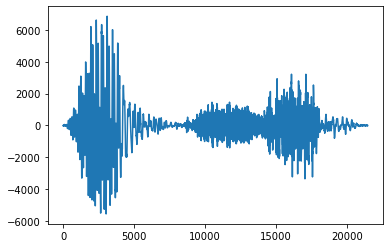

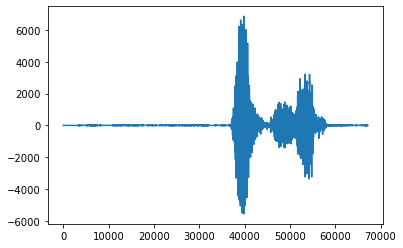

In [70]:
t, signal = read_wav(data_path + "yksi.wav")

plt.plot(remove_silence(signal))
plt.show()
plt.plot(signal)
plt.show()
Audio(remove_silence(signal), rate=fs)

In [18]:
plt.show()
read_file(data_path + "yksi.wav")
Audio(generate_noisy(signal, 0.01), rate=fs)


NameError: name 'read_file' is not defined

In [6]:
Audio(signal, rate=fs)